In [2]:
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import Model, load_model, Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Input, Masking, TimeDistributed, LSTM, Conv1D
from tensorflow.keras.layers import GRU, Bidirectional, BatchNormalization, Reshape
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Precision, Recall

import tensorflow as tf

2026-01-19 13:06:45.183700: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2026-01-19 13:06:45.190903: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1768828005.200012  303844 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1768828005.204494  303844 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1768828005.213248  303844 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

In [ ]:
import sys 
sys.path.append("..")
from RUN_TENSORBOARD import *


events_folder = "./logs"
main("./logs")

Selected port: 42255


/home/n/.conda/envs/ai_dev/lib/python3.12/site-packages/tensorboard/default.py:30: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources
2026-01-19 13:06:46.853038: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2026-01-19 13:06:46.860634: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1768828006.869738  303959 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one h

In [4]:
import pickle 

with open('X.pkl', 'rb') as f:
    X = pickle.load(f)

with open('Y.pkl', 'rb') as f:
    Y = pickle.load(f)

In [17]:

def modelf(input_shape):
    """
    Function creating the model's graph in Keras.
    
    Argument:
    input_shape -- shape of the model's input data (using Keras conventions)

    Returns:
    model -- Keras model instance
    """
    
    X_input = Input(shape = input_shape)
    
    
    X = Conv1D(256, kernel_size=15, strides=4)(X_input)
    X = BatchNormalization()(X)
    X = Activation("relu")(X)
    X = Dropout(0.5)(X)                                  

    X = GRU(128, return_sequences=True)(X)
    X = Dropout(0.5)(X)
    X = BatchNormalization()(X)
    
    X = GRU(128, return_sequences=True)(X)
    X = Dropout(0.5)(X)
    X = BatchNormalization()(X)
    X = Dropout(0.5)(X)                                 
    
    X = TimeDistributed(Dense(1, activation="sigmoid"))(X)

    model = Model(inputs = X_input, outputs = X)
    
    return model  

In [18]:
Tx = 431
n_freq = 256 
Ty = 105

hop_length=256 
n_mels = 256 # 

model = modelf(input_shape = (Tx, n_freq))
model.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 431, 256)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 105, 256)       │       983,296 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 105, 256)       │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 105, 256)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 105, 256)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_2 (GRU)                     │ (None, 105, 128)       │       148,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 105, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 105, 128)       │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_3 (GRU)                     │ (None, 105, 128)       │        99,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 105, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 105, 128)       │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 105, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_1              │ (None, 105, 1)         │           129 │
│ (TimeDistributed)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,232,769 (4.70 MB)

 Trainable params: 1,231,745 (4.70 MB)

 Non-trainable params: 1,024 (4.00 KB)

In [19]:
callbacks = [
    # TensorBoard for visualization
    tf.keras.callbacks.TensorBoard(
        log_dir=events_folder,
        histogram_freq=1,
        write_graph=True,
        update_freq='batch'  # Update more frequently
    ),
    
    # Model checkpoint to save best model
    tf.keras.callbacks.ModelCheckpoint(
        'best_model.keras',
        save_best_only=True,
        monitor='val_loss'
    ),
    tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              patience=20)
]

In [ ]:
# opt = Adam(learning_rate=1e-6)
# model.compile(loss='binary_crossentropy', optimizer=opt, metrics=["accuracy", Precision(name='precision'), Recall(name='recall'),])
# model.fit(X, Y, batch_size = 16, epochs=800, callbacks=callbacks, validation_split = 0.2 )

SyntaxError: invalid syntax (3380907591.py, line 1)

In [ ]:
model.load_weights('./best_model.keras')

# Predictions

In [21]:
import matplotlib.pyplot as plt
from pydub import AudioSegment
import matplotlib.pyplot as plt
import librosa
import numpy as np
import IPython


In [22]:

def get_mels_spectogram(file):
    y_orig, sr = librosa.load(file)
    S_orig = librosa.feature.melspectrogram(y=y_orig, sr=sr, n_mels=n_mels, hop_length=hop_length)
    S_dB_orig = librosa.power_to_db(S_orig, ref=np.max)
    return y_orig, S_orig, S_dB_orig, sr

def match_target_amplitude(sound, target_dBFS):
    change_in_dBFS = target_dBFS - sound.dBFS
    return sound.apply_gain(change_in_dBFS)

def detect_triggerword(filename, out_filename = "tmp.wav"):
    plt.subplot(2, 1, 1)
    
    # Correct the amplitude of the input file before prediction 
    audio_clip = AudioSegment.from_wav(filename)
    audio_clip = match_target_amplitude(audio_clip, -20.0)
    
    file_handle = audio_clip.export(out_filename, format="wav")
    y_gen, S_gen, S_dB_gen, sr = get_mels_spectogram(out_filename)

    # the spectrogram outputs (freqs, Tx) and we want (Tx, freqs) to input into the model
    x  = S_gen.swapaxes(0,1)
    x = np.expand_dims(x, axis=0)
    print(x.shape)
    predictions = model.predict(x)
    
    plt.subplot(2, 1, 2)
    plt.plot(predictions[0,:,0])
    plt.ylabel('probability')
    plt.show()
    return predictions


In [34]:
file = "./Dataset/training_set/train_1.wav"
IPython.display.Audio(file)

(1, 431, 256)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


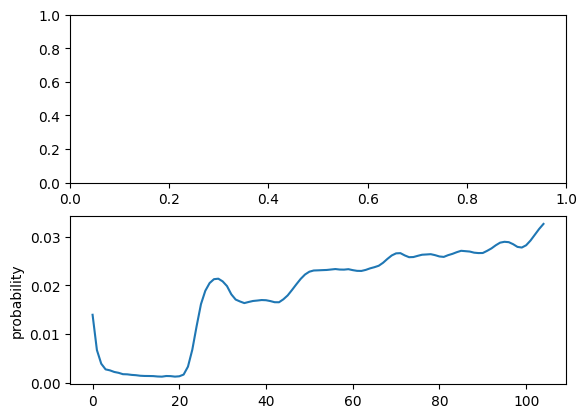

array([[[0.0139445 ],
        [0.00668958],
        [0.00388788],
        [0.00272628],
        [0.00252358],
        [0.00219574],
        [0.0020166 ],
        [0.00173676],
        [0.00170654],
        [0.00159269],
        [0.0015285 ],
        [0.00141548],
        [0.00137134],
        [0.00136139],
        [0.00134188],
        [0.0012633 ],
        [0.00123165],
        [0.00136099],
        [0.00133774],
        [0.00123639],
        [0.00130401],
        [0.00165648],
        [0.00328429],
        [0.00675897],
        [0.01161312],
        [0.01612686],
        [0.01887072],
        [0.02046839],
        [0.02125925],
        [0.02135889],
        [0.02081122],
        [0.01984327],
        [0.01814901],
        [0.01707218],
        [0.01667741],
        [0.01634661],
        [0.01657493],
        [0.01677986],
        [0.01686863],
        [0.01697266],
        [0.01693478],
        [0.01676026],
        [0.01652529],
        [0.01651633],
        [0.0171185 ],
        [0

In [35]:
predictions  = detect_triggerword(file)
predictions